In [1]:
# Importing required packages:
import pandas as pd
from collections import Counter
from matplotlib import pyplot
import numpy as np
import matplotlib
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, matthews_corrcoef
from sklearn.model_selection import train_test_split
%matplotlib inline

# Import dataset.
# Assign to a data frame:
df_card = pd.read_csv("creditcard.csv")

# Exploratory Data Analysis

In [2]:
# Explore the data frmae; first 10 rows: 
df_card.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [3]:
# Print the last 10 rows:
df_card.tail(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284797,172782.0,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,...,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,5.49,0
284798,172782.0,0.219529,0.881246,-0.635891,0.960928,-0.152971,-1.014307,0.427126,0.121340,-0.285670,...,0.099936,0.337120,0.251791,0.057688,-1.508368,0.144023,0.181205,0.215243,24.05,0
284799,172783.0,-1.775135,-0.004235,1.189786,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,...,0.103302,0.654850,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.130308,79.99,0
284800,172784.0,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,...,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [4]:
# Check if there are any NULL values in the data frame:
df_card.isnull().values.any()

False

In [5]:
# Summarize the 'class' distribution:
df_card["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

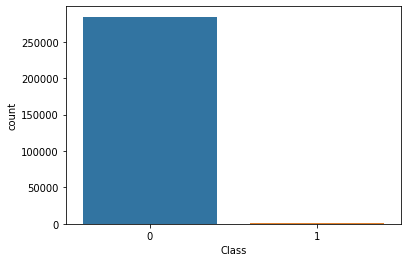

In [13]:
# Visualize the 'class' distribution using a bar chart:
sns.countplot(x = df_card["Class"])
pyplot.show()

In [2]:
# Analyze the fraudulent transactions:
fraud_t = df_card[df_card["Class"] == 1]
fraud_t.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [3]:
# Analyze the normal transactions:
normal_t = df_card[df_card["Class"] == 0]
normal_t.Amount.describe()


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

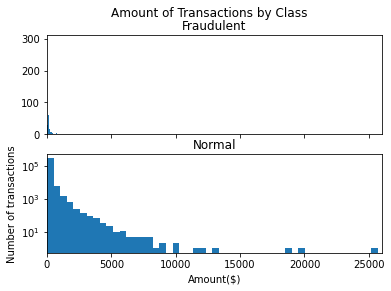

In [23]:
# Visualize the 'fraudulent' and 'normal' transaction distribution.
# Use a histogram:
f, (ax1, ax2) = pyplot.subplots(2, 1, sharex = True)
f.suptitle("Amount of Transactions by Class")
bins = 50
ax1.hist(fraud_t.Amount, bins = bins)
ax1.set_title("Fraudulent")
ax2.hist(normal_t.Amount, bins = bins)
ax2.set_title("Normal")
pyplot.xlabel("Amount($)")
pyplot.ylabel("Number of transactions")
pyplot.xlim(0, 26000)
pyplot.yscale("log")
pyplot.show()


In [18]:
# Overview of the data frame:
df_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

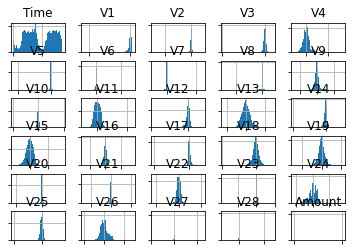

In [8]:
# Distribution of all feature(input) variables.
# Create a histogram of each:
new_df = df_card.drop(columns=["Class"])
distr_hist = new_df.hist(bins=100)

# Disable axis labels to avoid clutter:
for axis in distr_hist.flatten():
    axis.set_xticklabels([])
    axis.set_yticklabels([])
pyplot.show()

In [20]:
# Summarize the total number of transactions ('Amount' variable):
print(df_card["Amount"].describe())

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64


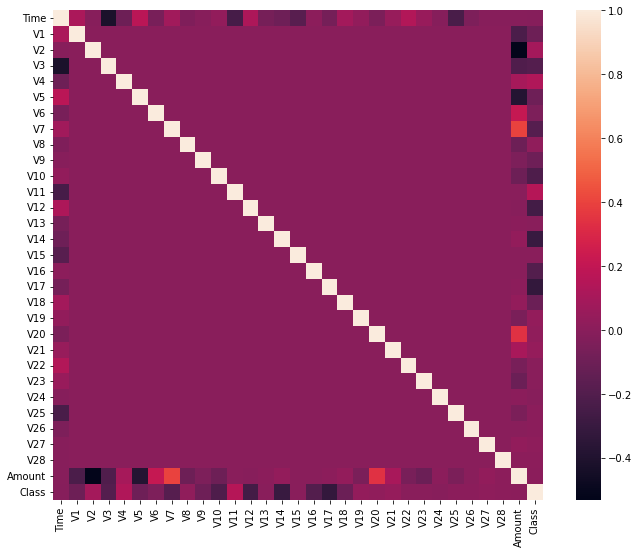

In [9]:
# Correlation matrix.
# Shows the relationship of feature variables to each other:
corrmatrix = df_card.corr()
fig = pyplot.figure(figsize = (12, 9))

sns.heatmap(corrmatrix, vmax = 1.0, square = True)
pyplot.show()

# Training & Test Splitting of Data

In [4]:
# Use a sample from the main dataframe:
df = df_card.sample(frac = 0.4, random_state = 1)

In [5]:
# Separate dataset as features and response variables:
input_ds = df.drop(columns=["Class"])
output_ds = df["Class"]

In [28]:
# Dataset summary:
print(input_ds.shape, output_ds.shape, Counter(output_ds))

(113923, 30) (113923,) Counter({0: 113737, 1: 186})


In [6]:
# Training and test splitting of data:
input_train, input_test, output_train, output_test = train_test_split(input_ds, output_ds, test_size = 0.2, random_state = 42)

In [7]:
# Applying a standard scalar to the data, prior to modeling.
# Provides optimized results:
sc = StandardScaler()
input_train = sc.fit_transform(input_train)
input_test = sc.transform(input_test)

In [31]:
# Print the first 10 rows of the 'input_train' 2D array:
print(input_train[:10, :])

[[ 5.34243064e-01 -6.52178790e-01  8.49699395e-01 -2.34775852e-01
   4.18304507e-01  7.71409938e-01 -1.03233172e-01  1.58294038e+00
  -6.87163795e-01  1.58560731e-01  1.63895454e+00  5.61202751e-01
   2.32859005e-01 -4.25734038e-01 -8.64449119e-02 -8.67609855e-01
  -1.27454420e+00 -5.57552747e-01  1.26568367e-01  1.43097284e+00
   1.55412752e-01 -5.61282210e-02  9.71353394e-01 -8.45690418e-01
  -6.45265779e-01  4.40916190e-02 -9.90545283e-01 -7.51302450e-01
   8.29674872e-02  2.50123267e-02]
 [ 1.21519191e+00 -7.06610721e-01  6.35284687e-01 -5.28993679e-01
  -6.32826160e-01  2.31764656e-02  7.45116572e-02 -2.73879513e-01
   3.63741286e-01  7.29989675e-01  2.07538771e-01  1.16942660e-01
   1.34416213e+00  1.16124135e+00  1.89970857e-02 -4.83146325e-01
   7.82873172e-01 -1.48716959e+00  1.19200471e+00 -2.40173780e-01
  -8.41248488e-01  8.07238888e-01  2.19821573e+00  6.76557601e-01
   5.26868581e-01 -3.83494709e+00 -1.57236923e+00 -2.64710065e+00
   1.35715699e-01 -3.26135149e-01]
 [-6.2

# Evaluate Machine Learning Algorithms

## 1) Random Forest Classifier

In [8]:
# Create the first model.
# It comprises of 200 trees.
# Train it.
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(input_train, output_train)
predictions_rfc = rfc.predict(input_test)

In [33]:
# Print the first 10 rows of the 'input_test' 2D array:
print(input_test[:10, :])

[[-6.66782667e-01 -7.60866727e-01  3.20373071e-01  7.27193217e-01
  -1.22060676e-01  1.16889755e-01 -4.17062522e-01  4.02889384e-01
   2.61721833e-01 -2.37345060e-01 -9.53068810e-01 -1.35424328e+00
   4.77010223e-01  5.94647777e-01 -8.24533069e-02 -9.12258155e-01
   1.26187598e-01 -3.12762704e-01 -5.62344561e-01 -5.57054890e-02
  -2.83667236e-01 -1.79473157e-01 -4.96065171e-01  1.82621460e-01
  -1.30956683e-01  4.76518313e-01  3.16274741e-01 -3.94757338e-01
  -4.18491629e-02 -1.58490280e-01]
 [ 6.56875309e-01  1.06951872e+00  2.49152575e-02 -1.17569196e+00
   2.89722388e-01  2.23858776e-01 -6.66867948e-01  7.18041254e-02
  -1.22630413e-01  6.66522383e-01 -3.12542989e-01 -8.60782073e-01
  -6.87747822e-01 -1.47482131e+00 -5.72433099e-01  4.16929213e-01
   4.66139851e-01  6.39484402e-01 -1.22141864e-01  1.04389148e-01
  -3.45583914e-01 -5.30124569e-01 -1.49032799e+00  5.73527267e-01
   7.32279162e-01 -5.83129860e-01  3.67569158e-01 -1.87806870e-01
  -1.05436489e-01 -3.57643606e-01]
 [ 1.5

In [34]:
# Print the first 10 elements of the 'predictions' 1D array:
print(predictions_rfc[0:10])

[0 0 0 0 0 0 0 0 0 0]


In [35]:
# Evaluating the model's performance:
n_errors = (predictions_rfc != output_test).sum()

print("The model's performance summary is:\n")
print(classification_report(output_test, predictions_rfc))
print("\nThe total number of errors is: ", n_errors)

The model's performance summary is:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22751
           1       0.92      0.71      0.80        34

    accuracy                           1.00     22785
   macro avg       0.96      0.85      0.90     22785
weighted avg       1.00      1.00      1.00     22785


The total number of errors is:  12


In [36]:
# Calculate the model's accuracy score:
acc_score = accuracy_score(output_test, predictions_rfc)
print("The accuracy score is: ", round(acc_score, 3))

The accuracy score is:  0.999


In [37]:
# Calculate the Matthews correlation coefficient:
mcc = matthews_corrcoef(output_test, predictions_rfc)
print("The Matthews correlation coefficient is: ", round(mcc, 3))

The Matthews correlation coefficient is:  0.807


In [38]:
# Calculate the confusion matrix:
print(confusion_matrix(output_test, predictions_rfc))

[[22749     2]
 [   10    24]]


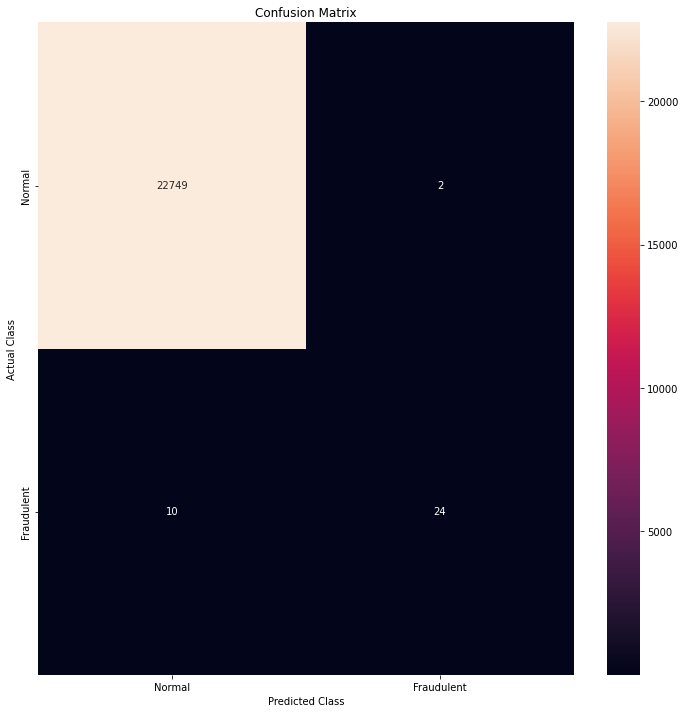

In [39]:
# Visualize the confusion matrix.
# Use a seaborn heatmap:
labels = ["Normal", "Fraudulent"]
conf_matrix = confusion_matrix(output_test, predictions_rfc)
pyplot.figure(figsize = (12, 12))

sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, fmt = "d")
pyplot.title("Confusion Matrix")
pyplot.xlabel("Predicted Class")
pyplot.ylabel("Actual Class")
pyplot.show()


### Credit Card Fraud Predictions

#### Case 1:

In [12]:
# Predict the 'class' of a transaction with the following attributes:
new_input_test = [[428, -2.31445, 1.75223, -1.7199, 3.9928, -0.42319,
                   -1.56255, -2.5281, 1.42771, -2.87112, -2.8127, 3.27033, 
                   -2.79812, -0.66622, -4.55259, 0.559247, -1.75015, -2.95306, 
                   -0.21628, 0.81569, 0.16921, 0.72352, -0.23506, -0.35261, 
                   0.42198, 0.14519, 0.27784, 0.271154, -0.14823, 478]]
                   
new_input_test = sc.transform(new_input_test)
predictions_rfc = rfc.predict(new_input_test)
print("The transaction's class is: ", predictions_rfc)

if (predictions_rfc == 1):
    print("Warning!!! The credit card transaction is fraudulent.")
else:
    print("The credit card transaction is normal.")

The transaction's class is:  [1]
Warning!!! The credit card transaction is fraudulent.


C:\Users\Miketobbz\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


#### Case 2:

In [13]:
# Predict the 'class' of a transaction with the following attributes:
new_input_test = [[406, -2.31223, 1.951992, -1.6098507, 3.9979056, -0.522188,
                   -1.426545, -2.537387, 1.3916578, -2.770089, -2.7722721, 3.2020332, 
                   -2.8999073, -0.5952219, -4.289254, 0.3897241, -1.1407471, -2.8300557, 
                   -0.0168225, 0.4169557, 0.12691056, 0.517232, -0.03504936, -0.4652110, 
                   0.3201982, 0.0445192, 0.1778397, 0.2611450, -0.1432759, 0]]
                   
new_input_test = sc.transform(new_input_test)
predictions_rfc = rfc.predict(new_input_test)
print("The transaction's class is: ", predictions_rfc)

if (predictions_rfc == 1):
    print("Warning!!! The credit card transaction is fraudulent.")
else:
    print("The credit card transaction is normal.")

The transaction's class is:  [1]
Warning!!! The credit card transaction is fraudulent.


C:\Users\Miketobbz\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


#### Case 3:

In [15]:
# Predict the 'class' of a transaction with the following attributes:
new_input_test = [[7627, 1.231223, 3.0197404, -4.304596884, 4.73279513, 3.62420083,
                   -1.357745663, 1.713444987, -0.496358487, -1.282857820, -2.44746925511, 2.101343865, 
                   -4.6096284, 1.46437762, -6.07933719, -0.339237372, 2.5818509, -6.73938438, 
                   -3.04249318, 2.72185312, 0.00906084, -0.37906831, -0.70418103, -0.65680475, 
                   -1.63265295, 1.488901448, 0.5667973, -0.01001622, 0.14679273, 378.66]]
                   
new_input_test = sc.transform(new_input_test)
predictions_rfc = rfc.predict(new_input_test)
print("The transaction's class is: ", predictions_rfc)

if (predictions_rfc == 1):
    print("Warning!!! The credit card transaction is fraudulent.")
else:
    print("The credit card transaction is normal.")

The transaction's class is:  [1]
Warning!!! The credit card transaction is fraudulent.


C:\Users\Miketobbz\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## 2) Isolation Forest Classifier

In [9]:
# Create the second model. It detects anomalies in the dataset.
# It comprises of 200 trees.
# Train it:
outlier_fraction = len(fraud_t)/float(len(normal_t))

ifc = IsolationForest(n_estimators = 200, max_samples = len(input_train), contamination = outlier_fraction, random_state = 1)
ifc.fit(input_train)
# Calculates the mean anomaly score:
scores_pred = ifc.decision_function(input_train)
predictions_ifc = ifc.predict(input_test)

# Reshape the prediction values to 0 for 'normal' and 1 for 'fraud':
predictions_ifc[predictions_ifc == 1] = 0
predictions_ifc[predictions_ifc == -1] = 1

In [41]:
# Print the first 10 elements of the 'predictions' 1D array:
print(predictions_ifc[0:10])

[0 0 0 0 0 0 0 0 0 0]


In [42]:
# Evaluate the model's performance:
n_errors = (predictions_ifc != output_test).sum()

print("The model's performance summary is:\n")
print(classification_report(output_test, predictions_ifc))
print("\nThe total number of errors is: ", n_errors)

The model's performance summary is:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22751
           1       0.28      0.35      0.31        34

    accuracy                           1.00     22785
   macro avg       0.64      0.68      0.66     22785
weighted avg       1.00      1.00      1.00     22785


The total number of errors is:  53


In [43]:
# Calculate the model's accuracy score:
acc_score = accuracy_score(output_test, predictions_ifc)
print("The accuracy score is: ", round(acc_score, 3))

The accuracy score is:  0.998


In [52]:
# Calculate the Matthews correlation coefficient:
mcc = matthews_corrcoef(output_test, predictions_ifc)
print("The Matthews correlation coefficient is: ", round(mcc, 3))

The Matthews correlation coefficient is:  0.313


In [45]:
# Calculate the confusion matrix:
print(confusion_matrix(output_test, predictions_ifc))

[[22720    31]
 [   22    12]]


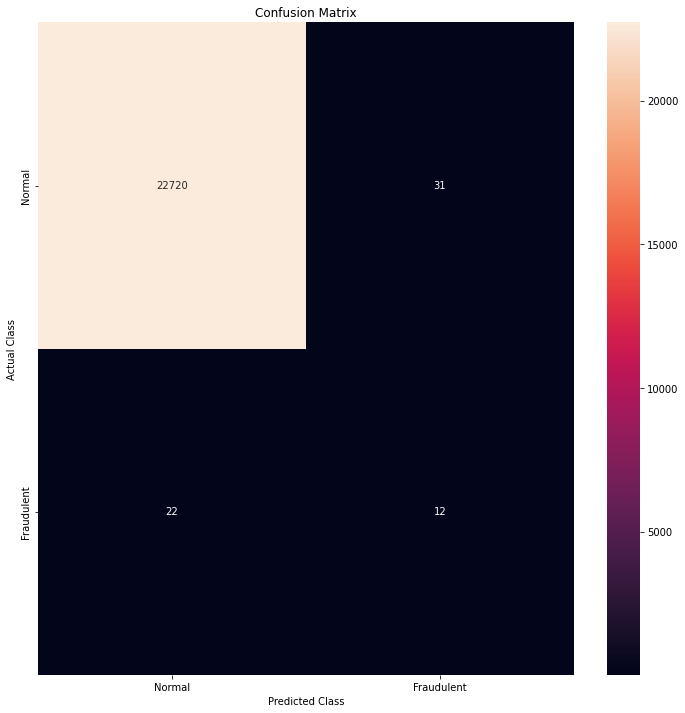

In [46]:
# Visualize the confusion matrix.
# Use a seaborn heatmap:
labels = ["Normal", "Fraudulent"]
conf_matrix = confusion_matrix(output_test, predictions_ifc)
pyplot.figure(figsize = (12, 12))

sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, fmt = "d")
pyplot.title("Confusion Matrix")
pyplot.xlabel("Predicted Class")
pyplot.ylabel("Actual Class")
pyplot.show()

### Credit Card Fraud Predictions

#### Case 1:

In [18]:
# Predict the 'class' of a transaction with the following attributes:
new_input_test = [[428, -2.31445, 1.75223, -1.7199, 3.9928, -0.42319,
                   -1.56255, -2.5281, 1.42771, -2.87112, -2.8127, 3.27033, 
                   -2.79812, -0.66622, -4.55259, 0.559247, -1.75015, -2.95306, 
                   -0.21628, 0.81569, 0.16921, 0.72352, -0.23506, -0.35261, 
                   0.42198, 0.14519, 0.27784, 0.271154, -0.14823, 478]]
                   
new_input_test = sc.transform(new_input_test)
predictions_rfc = rfc.predict(new_input_test)
print("The transaction's class is: ", predictions_rfc)

if (predictions_rfc == 1):
    print("Warning!!! The credit card transaction is fraudulent.")
else:
    print("The credit card transaction is normal.")

The transaction's class is:  [1]
Warning!!! The credit card transaction is fraudulent.


C:\Users\Miketobbz\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


#### Case 2:

In [16]:
# Predict the 'class' of a transaction with the following attributes:
new_input_test = [[406, -2.31223, 1.951992, -1.6098507, 3.9979056, -0.522188,
                   -1.426545, -2.537387, 1.3916578, -2.770089, -2.7722721, 3.2020332, 
                   -2.8999073, -0.5952219, -4.289254, 0.3897241, -1.1407471, -2.8300557, 
                   -0.0168225, 0.4169557, 0.12691056, 0.517232, -0.03504936, -0.4652110, 
                   0.3201982, 0.0445192, 0.1778397, 0.2611450, -0.1432759, 0]]
                   
new_input_test = sc.transform(new_input_test)
predictions_rfc = rfc.predict(new_input_test)
print("The transaction's class is: ", predictions_rfc)

if (predictions_rfc == 1):
    print("Warning!!! The credit card transaction is fraudulent.")
else:
    print("The credit card transaction is normal.")

The transaction's class is:  [1]
Warning!!! The credit card transaction is fraudulent.


C:\Users\Miketobbz\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


#### Case 3:

In [17]:
# Predict the 'class' of a transaction with the following attributes:
new_input_test = [[7627, 1.231223, 3.0197404, -4.304596884, 4.73279513, 3.62420083,
                   -1.357745663, 1.713444987, -0.496358487, -1.282857820, -2.44746925511, 2.101343865, 
                   -4.6096284, 1.46437762, -6.07933719, -0.339237372, 2.5818509, -6.73938438, 
                   -3.04249318, 2.72185312, 0.00906084, -0.37906831, -0.70418103, -0.65680475, 
                   -1.63265295, 1.488901448, 0.5667973, -0.01001622, 0.14679273, 378.66]]
                   
new_input_test = sc.transform(new_input_test)
predictions_rfc = rfc.predict(new_input_test)
print("The transaction's class is: ", predictions_rfc)

if (predictions_rfc == 1):
    print("Warning!!! The credit card transaction is fraudulent.")
else:
    print("The credit card transaction is normal.")

The transaction's class is:  [1]
Warning!!! The credit card transaction is fraudulent.


C:\Users\Miketobbz\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## 3) Multi-layer Perceptron Classifier(Neural Network)

In [10]:
# Create the third model-a neural network.
# The neural network is trained using standardized data.

mlpc = MLPClassifier(hidden_layer_sizes = (16,), activation = "logistic", solver = "adam", verbose = True)
mlpc.fit(input_train, output_train)
predictions_mlpc = mlpc.predict(input_test)

Iteration 1, loss = 0.31906388
Iteration 2, loss = 0.05206952
Iteration 3, loss = 0.02168681
Iteration 4, loss = 0.01271103
Iteration 5, loss = 0.00887408
Iteration 6, loss = 0.00694980
Iteration 7, loss = 0.00587023
Iteration 8, loss = 0.00520531
Iteration 9, loss = 0.00476715
Iteration 10, loss = 0.00447167
Iteration 11, loss = 0.00426864
Iteration 12, loss = 0.00410940
Iteration 13, loss = 0.00399314
Iteration 14, loss = 0.00390049
Iteration 15, loss = 0.00382171
Iteration 16, loss = 0.00374382
Iteration 17, loss = 0.00365966
Iteration 18, loss = 0.00359691
Iteration 19, loss = 0.00352013
Iteration 20, loss = 0.00344898
Iteration 21, loss = 0.00337534
Iteration 22, loss = 0.00330260
Iteration 23, loss = 0.00323158
Iteration 24, loss = 0.00316901
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


In [48]:
# Show the first 10 elements of the 'predictions' 1D array:
print(predictions_mlpc[0:10])

[0 0 0 0 0 0 0 0 0 0]


In [49]:
# Evaluate the neural network's performance:
n_errors = (predictions_mlpc != output_test).sum()

print("The performance summary is:\n")
print(classification_report(output_test, predictions_mlpc))
print("\nThe total number of errors is: ", n_errors)

The performance summary is:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22751
           1       0.89      0.74      0.81        34

    accuracy                           1.00     22785
   macro avg       0.95      0.87      0.90     22785
weighted avg       1.00      1.00      1.00     22785


The total number of errors is:  12


In [50]:
# Calculate the neural network's accuracy score:
acc_score = accuracy_score(output_test, predictions_mlpc)
print("The accuracy score is: ", round(acc_score, 3))

The accuracy score is:  0.999


In [51]:
# Calculate the Matthews correlation coefficient:
mcc = matthews_corrcoef(output_test, predictions_mlpc)
print("The Matthews correlation coefficient is: ", round(mcc, 3))

The Matthews correlation coefficient is:  0.81


In [53]:
# Calculate the confusion matrix:
print(confusion_matrix(output_test, predictions_mlpc))

[[22748     3]
 [    9    25]]


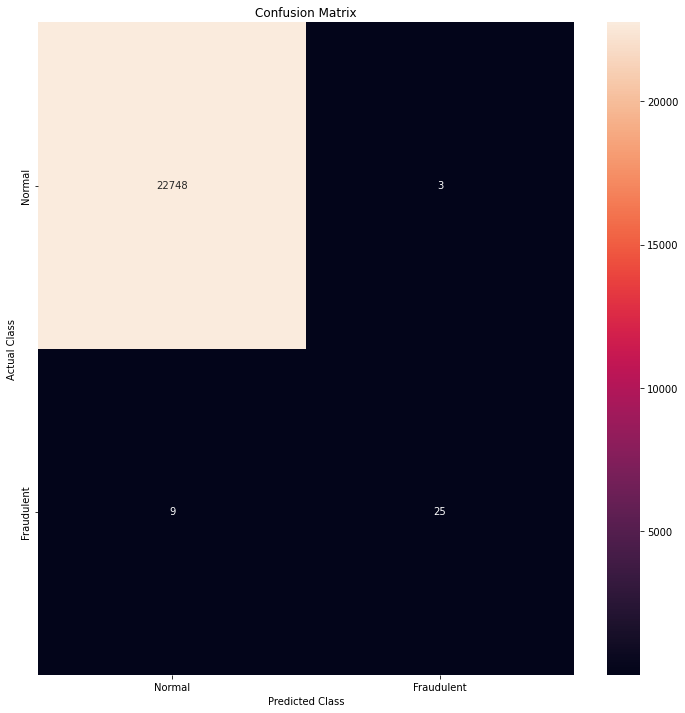

In [54]:
# Visualize the confusion matrix.
# Use a seaborn heatmap:
labels = ["Normal", "Fraudulent"]
conf_matrix = confusion_matrix(output_test, predictions_mlpc)
pyplot.figure(figsize = (12, 12))

sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, fmt = "d")
pyplot.title("Confusion Matrix")
pyplot.xlabel("Predicted Class")
pyplot.ylabel("Actual Class")
pyplot.show()

### Credit Card Fraud Predictions

#### Case 1:

In [19]:
# Predict the 'class' of a transaction with the following attributes:
new_input_test = [[428, -2.31445, 1.75223, -1.7199, 3.9928, -0.42319,
                   -1.56255, -2.5281, 1.42771, -2.87112, -2.8127, 3.27033, 
                   -2.79812, -0.66622, -4.55259, 0.559247, -1.75015, -2.95306, 
                   -0.21628, 0.81569, 0.16921, 0.72352, -0.23506, -0.35261, 
                   0.42198, 0.14519, 0.27784, 0.271154, -0.14823, 478]]
                   
new_input_test = sc.transform(new_input_test)
predictions_rfc = rfc.predict(new_input_test)
print("The transaction's class is: ", predictions_rfc)

if (predictions_rfc == 1):
    print("Warning!!! The credit card transaction is fraudulent.")
else:
    print("The credit card transaction is normal.")

The transaction's class is:  [1]
Warning!!! The credit card transaction is fraudulent.


C:\Users\Miketobbz\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


#### Case 2:

In [20]:
# Predict the 'class' of a transaction with the following attributes:
new_input_test = [[406, -2.31223, 1.951992, -1.6098507, 3.9979056, -0.522188,
                   -1.426545, -2.537387, 1.3916578, -2.770089, -2.7722721, 3.2020332, 
                   -2.8999073, -0.5952219, -4.289254, 0.3897241, -1.1407471, -2.8300557, 
                   -0.0168225, 0.4169557, 0.12691056, 0.517232, -0.03504936, -0.4652110, 
                   0.3201982, 0.0445192, 0.1778397, 0.2611450, -0.1432759, 0]]
                   
new_input_test = sc.transform(new_input_test)
predictions_rfc = rfc.predict(new_input_test)
print("The transaction's class is: ", predictions_rfc)

if (predictions_rfc == 1):
    print("Warning!!! The credit card transaction is fraudulent.")
else:
    print("The credit card transaction is normal.")

The transaction's class is:  [1]
Warning!!! The credit card transaction is fraudulent.


C:\Users\Miketobbz\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


#### Case 3:

In [21]:
# Predict the 'class' of a transaction with the following attributes:
new_input_test = [[7627, 1.231223, 3.0197404, -4.304596884, 4.73279513, 3.62420083,
                   -1.357745663, 1.713444987, -0.496358487, -1.282857820, -2.44746925511, 2.101343865, 
                   -4.6096284, 1.46437762, -6.07933719, -0.339237372, 2.5818509, -6.73938438, 
                   -3.04249318, 2.72185312, 0.00906084, -0.37906831, -0.70418103, -0.65680475, 
                   -1.63265295, 1.488901448, 0.5667973, -0.01001622, 0.14679273, 378.66]]
                   
new_input_test = sc.transform(new_input_test)
predictions_rfc = rfc.predict(new_input_test)
print("The transaction's class is: ", predictions_rfc)

if (predictions_rfc == 1):
    print("Warning!!! The credit card transaction is fraudulent.")
else:
    print("The credit card transaction is normal.")

The transaction's class is:  [1]
Warning!!! The credit card transaction is fraudulent.


C:\Users\Miketobbz\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
